# **WMM 2025L - Laboratorium 1. Analiza częstotliwościowa sygnałów czasu dyskretnego**
## **Maciej Bogusławski (331362), Hubert Kaczyński (331386)**

Niniejszy notatnik stanowi sprawozdanie z laboratorium nr 1 z przedmiotu WMM.



## **Zadanie 1**
Liczba próbek (w jednym okresie) sygnału rzeczywistego $ 𝑠(𝑡) = 𝑐𝑜𝑠(2𝜋𝑡) $ wynosi 𝑁, gdzie N jest potęgą 2.

a) Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

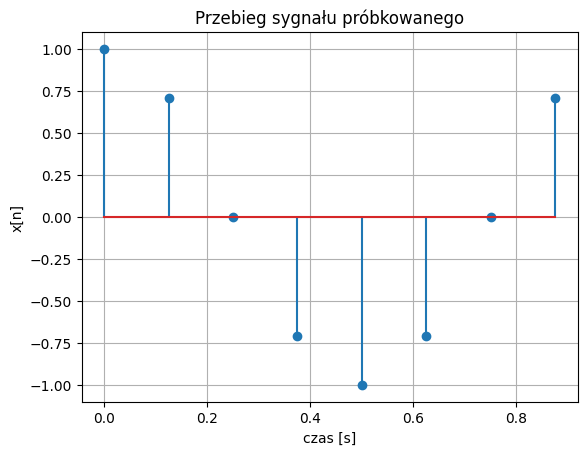

In [77]:
import numpy as np
import matplotlib.pyplot as plt

N = 8 # liczba próbek
n = np.arange(0, N) # indeksy próbek
t = n / N # czas próbkowania
x = np.cos(2 * np.pi * t) # sygnał próbkowany

plt.stem(t, x)
plt.title("Przebieg sygnału próbkowanego")
plt.xlabel("czas [s]")
plt.ylabel("x[n]")
plt.grid(True)

Zgodnie z rekomendacjami na stacjonarnych konsultacjach, części urojone wyników algorytmu FFT bardzo bliskie zeru uznane zostały za wartości pomijalne.

[-3.44509285e-16+0.00000000e+00j  4.00000000e+00-4.66973965e-16j
  1.22464680e-16+0.00000000e+00j  0.00000000e+00+2.28847549e-17j
  9.95799250e-17+0.00000000e+00j  0.00000000e+00-2.28847549e-17j
  1.22464680e-16+0.00000000e+00j  4.00000000e+00+4.66973965e-16j]


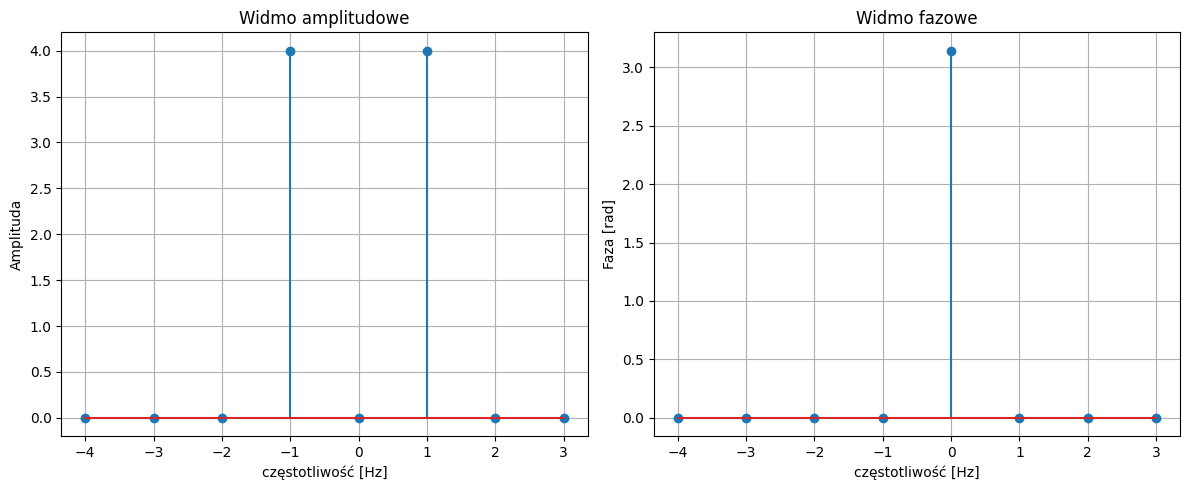

In [ ]:
X = np.fft.fft(x) # dyskretna transformata Fouriera
epsilon = 1e-10

# usuwanie błędów numerycznych jeżeli część urojona jest bliska 0
print(X)
X.imag[np.abs(X.imag) < epsilon] = 0

freq = np.fft.fftfreq(N, 1 / N)
 
X_mag = np.abs(X) # widmo amplitudowe
X_phase = np.angle(X) # widmo fazowe

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.stem(freq, X_mag)
plt.title("Widmo amplitudowe")
plt.xlabel("częstotliwość [Hz]")
plt.ylabel("Amplituda")
plt.grid(True)

plt.subplot(122)
plt.stem(freq, X_phase)
plt.title("Widmo fazowe")
plt.xlabel("częstotliwość [Hz]")
plt.ylabel("Faza [rad]")
plt.grid(True)

plt.tight_layout()
plt.show()

In [85]:
parseval_left = np.sum(np.abs(x) ** 2)
parseval_right = np.sum(np.abs(X) ** 2) / N

print("Weryfikacja twierdzenia Parsevala:")
print(f"Parseval dla sygnału: {parseval_left}")
print(f"Parseval dla widma: {parseval_right}")

Weryfikacja twierdzenia Parsevala:
Parseval dla sygnału: 4.0
Parseval dla widma: 4.0


Jak widać, lewa i prawa strona równania Parsevala są sobie równe, co wykazuje słuszność twierdzenia.

b) Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą algorytmu FFT w funkcji liczby próbek $ 𝑁 = 2^l, 𝑙 ∈ ℕ $. Skomentować kształt otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT.

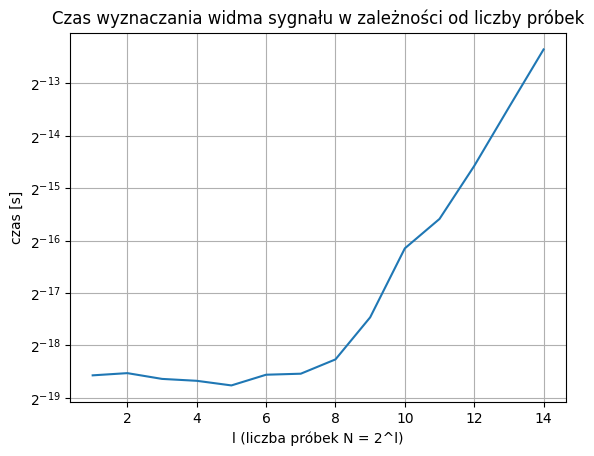

In [49]:
import time

def fft_time(l):
    N = 2 ** l
    n = np.arange(0, N)
    t = n / N
    x = np.cos(2 * np.pi * t)
    num_iters = 10000
    
    start = time.time()

    for _ in range(num_iters):
        np.fft.fft(x)
    
    end = time.time()

    return (end - start) / num_iters

times = [fft_time(l) for l in range(1, 15)]
plt.plot(range(1, 15), times)

plt.title("Czas wyznaczania widma sygnału w zależności od liczby próbek")
plt.xlabel("l (liczba próbek N = 2^l)")
plt.ylabel("czas [s]")
plt.yscale("log", base=2)
plt.grid(True)
plt.show()

Powyższy wykres, przedstawiający czas wyznaczania widma sygnału w zależności od liczby próbek, przedstawia kształt zbliżony do teoretycznej złożoności obliczeniowej algorytmu FFT, któa wynosi $O(n log(n))$. 

## **Zadanie 2**
Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego
sygnału harmonicznego 𝑠[𝑛] = 𝐴 𝑐𝑜𝑠 (2𝜋 𝑛/𝑁) o amplitudzie 𝐴 = 3 i okresie podstawowym 𝑁 = 76.

W tym celu dla każdej wartości 𝑛0 ∈ {0, 𝑁/4, 𝑁/2, 3𝑁/4} wykreślić widmo amplitudowe i fazowe przesuniętego sygnału 𝑠[𝑛 − 𝑛0]. Skomentować otrzymane wyniki.


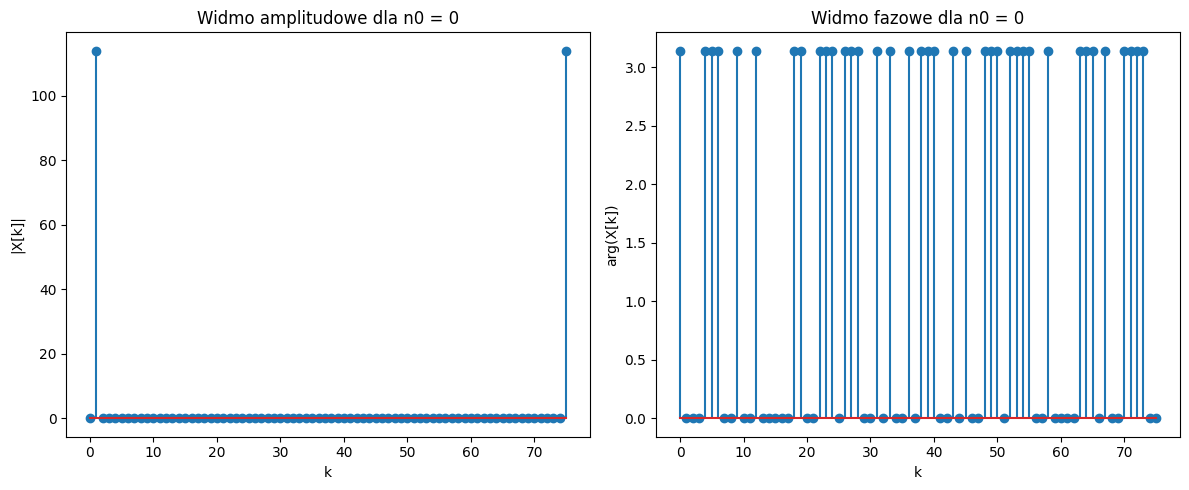

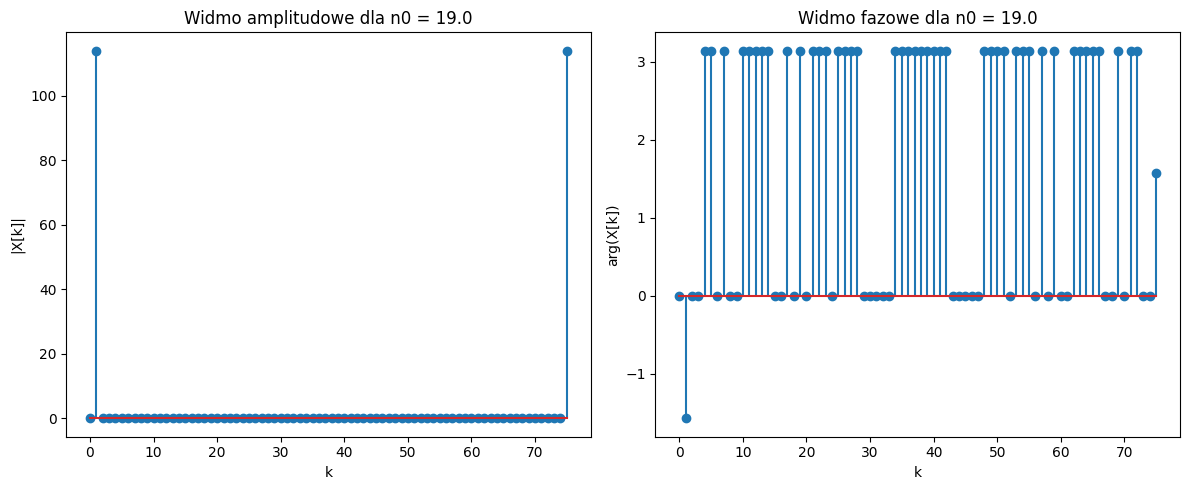

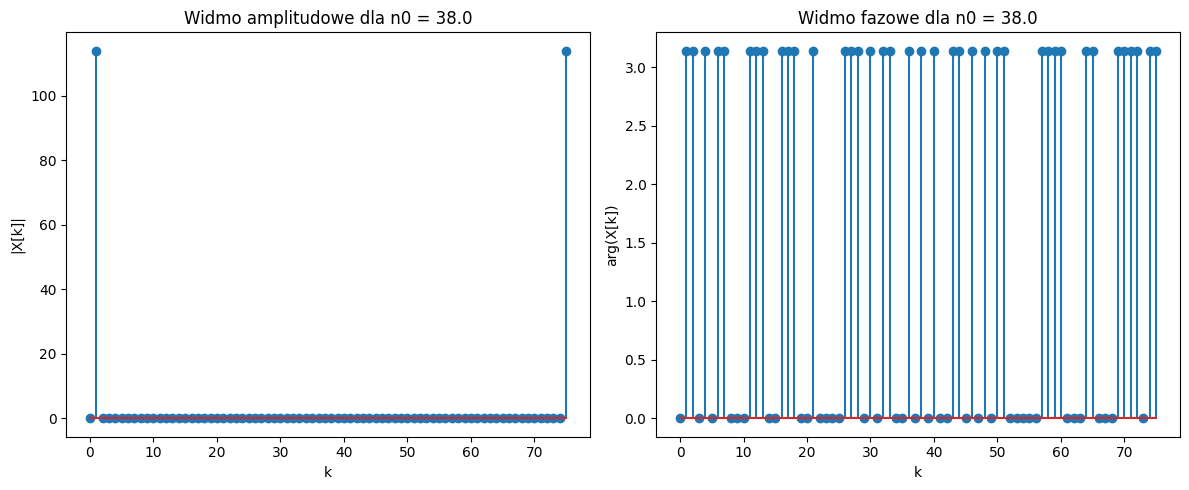

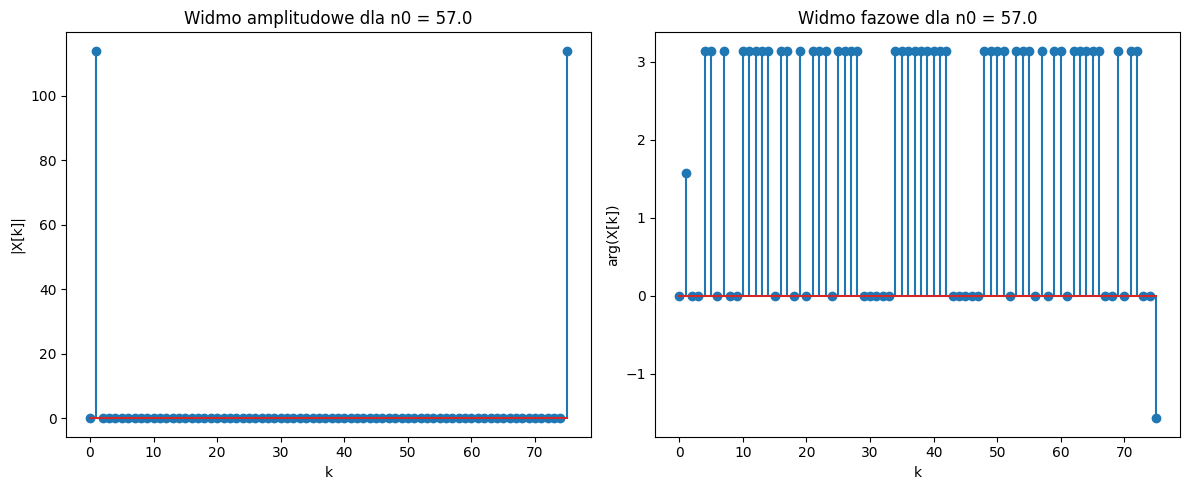

In [ ]:
A = 3
N = 76
epsilon = 1e-10
n0_values = [0, N / 4, N / 2, 3 * N / 4]
n = np.arange(0, N)

def s(n, n0):
    return A * np.cos(2 * np.pi * (n - n0) / N)

for n0 in n0_values:
    x = s(n, n0)
    X = np.fft.fft(x)

    # usuwanie części urojonej bliskiej 0
    X.imag[np.abs(X.imag) < epsilon] = 0
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.stem(n, np.abs(X))
    plt.title(f"Widmo amplitudowe dla n0 = {n0}")
    plt.xlabel("k")
    plt.ylabel("|X[k]|")
    
    plt.subplot(122)
    plt.stem(n, np.angle(X))
    plt.title(f"Widmo fazowe dla n0 = {n0}")
    plt.xlabel("k")
    plt.ylabel("arg(X[k])")
    
    plt.tight_layout()
    plt.show()

**Komentarz wyników:** Jak widać na wygenerowanych wykresach, widmo amplitudowe pozostaje niezmienne dla różnych przesunięć.
Zmianie w zależności od przesunięcia ulega natomiast widmo fazowe.

Takie obserwacje zgadzają się z właściwościami transformaty Fouriera dotyczącymi przesunięcia czasowego.

## **Zadanie 3**

Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego sygnału 𝑠[𝑛] = $ 𝐴 (𝑛 𝑚𝑜𝑑 𝑁)/𝑁 $ o amplitudzie 𝐴 = 1 i okresie podstawowym 𝑁 = 17. W tym celu dla każdej wartości 𝑁0 ∈ {0,1𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛] dopełnionego 𝑁0 zerami. Skomentować otrzymane wyniki.

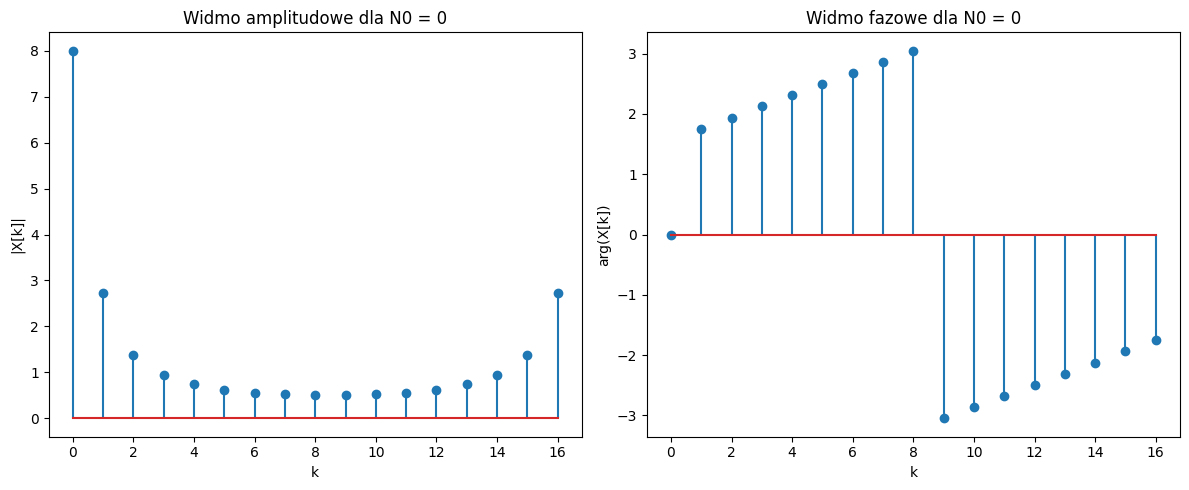

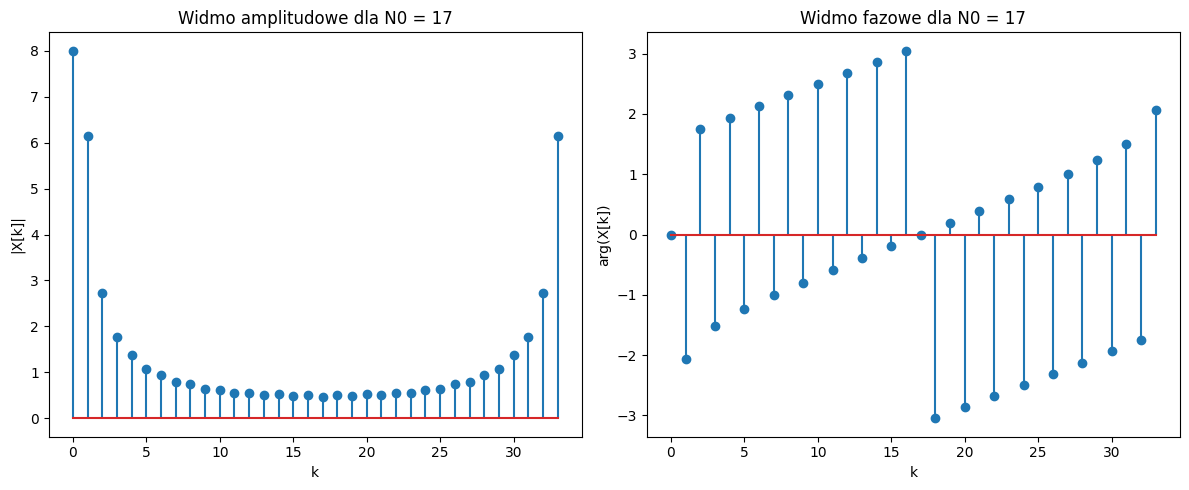

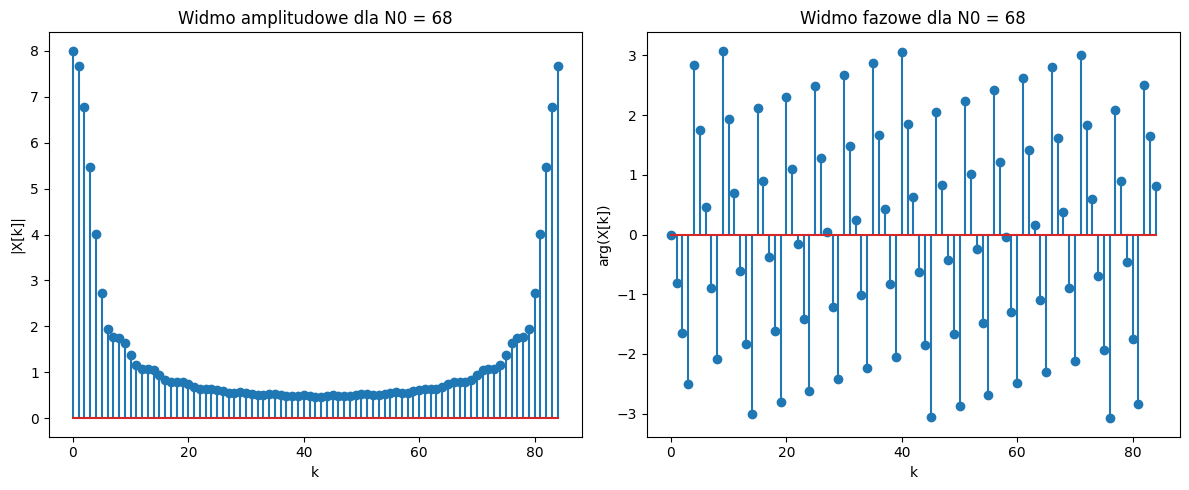

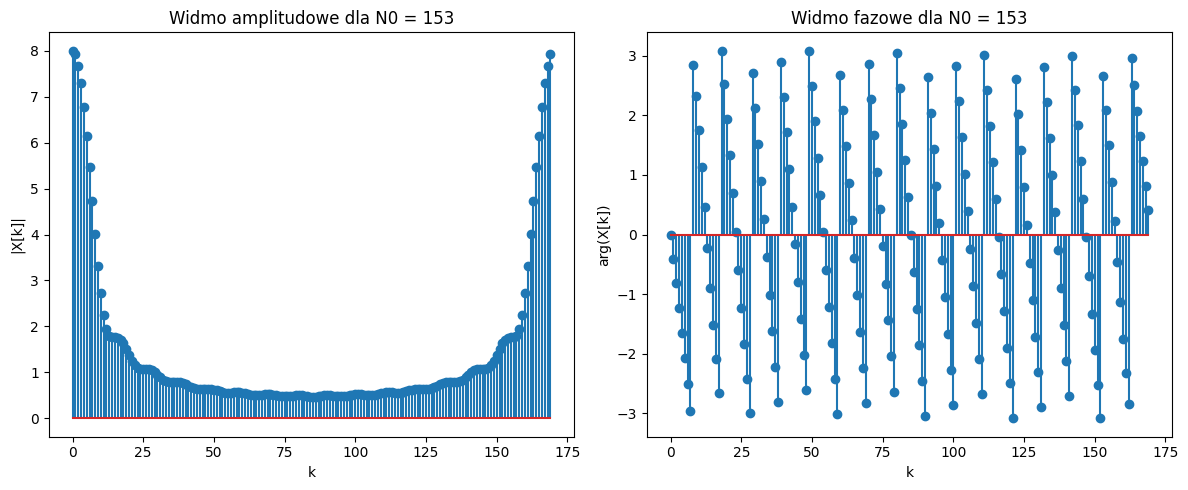

In [87]:
A = 1
N = 17
epsilon = 1e-10
N0_values = [0, N, 4 * N, 9 * N]
n = np.arange(0, N)

def s(n, N0):
    result = A * (n % N) / N
    return np.concatenate((result, np.zeros(N0)))

for N0 in N0_values:
    x = s(n, N0)
    X = np.fft.fft(x)

    X.imag[np.abs(X.imag) < epsilon] = 0
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.stem(np.arange(0, N + N0), np.abs(X))
    plt.title(f"Widmo amplitudowe dla N0 = {N0}")
    plt.xlabel("k")
    plt.ylabel("|X[k]|")
    
    plt.subplot(122)
    plt.stem(np.arange(0, N + N0), np.angle(X))
    plt.title(f"Widmo fazowe dla N0 = {N0}")
    plt.xlabel("k")
    plt.ylabel("arg(X[k])")
    
    plt.tight_layout()
    plt.show()

**Komentarz wyników:**
Jak widać na powyższych wykresach, dopełnianie coraz większą ilością zer powoduje zwiększenie szczegółowości obu widm. Jednocześnie charakter wykresów obu widm nie ulega zmianie - wykresy są podobne w swoim kształcie.

## **Zadanie 4**

Dany jest sygnał rzeczywisty $ 𝑠(𝑡) = 𝐴1 sin(2𝜋𝑓1𝑡) + 𝐴2 sin(2𝜋𝑓2𝑡) + 𝐴3 sin(2𝜋𝑓3𝑡) $, gdzie 𝐴1 = 0.2 , 𝑓1 = 2000 Hz, 𝐴2 = 0.5 , 𝑓2 = 6000 Hz, 𝐴3 = 0.6 , 𝑓3 = 10000 Hz. Przy założeniu, że
częstotliwość próbkowania wynosi 𝑓𝑠 = 48000 Hz, a liczba próbek sygnału wynosi 𝑁1 = 2048 ,
przedstawić wykres widmowej gęstości mocy sygnału spróbkowanego . Czy dla podanej liczby próbek
mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek
𝑁2 = 3/2 𝑁1? Odpowiedź uzasadnić.

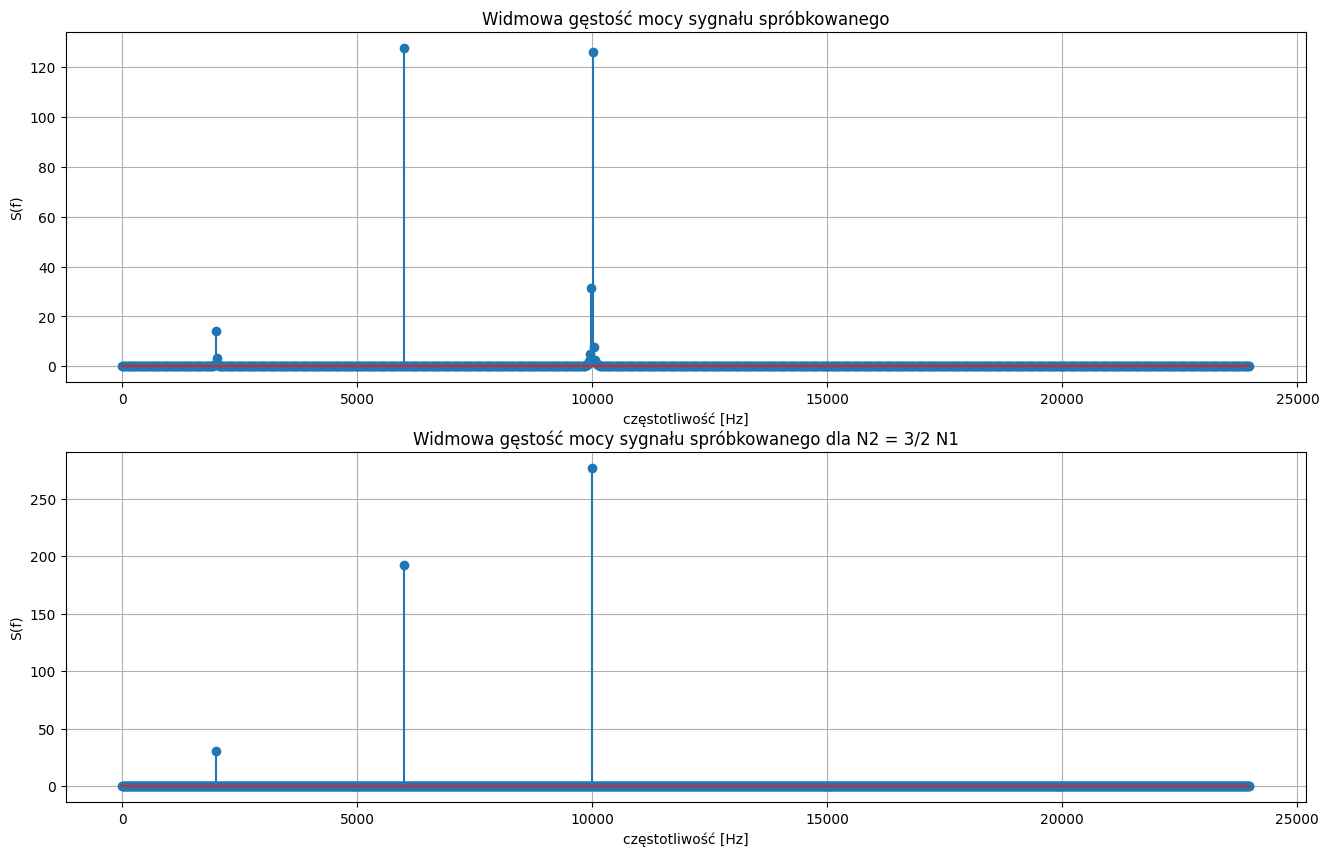

In [52]:
A1 = 0.2
f1 = 2000
A2 = 0.5
f2 = 6000
A3 = 0.6
f3 = 10000
fs = 48000
N1 = 2048
N2 = int(3 / 2 * N1)

t = np.arange(0, N1) / fs
s = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t) + A3 * np.sin(2 * np.pi * f3 * t)
X = np.fft.fft(s)

X.imag[np.abs(X.imag) < epsilon] = 0

X_density = np.abs(X) ** 2 / N1 # widmowa gęstość mocy
freq = np.fft.fftfreq(N1, 1 / fs)

plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.stem(freq[:N1//2], X_density[:N1//2])
plt.title("Widmowa gęstość mocy sygnału spróbkowanego")
plt.xlabel("częstotliwość [Hz]")
plt.ylabel("S(f)")
plt.grid(True)

t_2 = np.arange(0, N2) / fs
s_2 = A1 * np.sin(2 * np.pi * f1 * t_2) + A2 * np.sin(2 * np.pi * f2 * t_2) + A3 * np.sin(2 * np.pi * f3 * t_2)
X_2 = np.fft.fft(s_2)
X_density_2 = np.abs(X_2) ** 2 / N2 # widmowa gęstość mocy
freq_2 = np.fft.fftfreq(N2, 1 / fs)

plt.subplot(212)
plt.stem(freq_2[:N2//2], X_density_2[:N2//2])
plt.title("Widmowa gęstość mocy sygnału spróbkowanego dla N2 = 3/2 N1")
plt.xlabel("częstotliwość [Hz]")
plt.ylabel("S(f)")
plt.grid(True)
plt.show()


Powyższe wykresy umożliwiają odpowiedzi na następujące pytania.

**Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma?**

Pierwszy wykres wyraźnie przedstawia trzy wzrosty wartości odpowiadajace trzem częstotliwościom. Jednakże w ich bliskim sąsiedztwie znajduje się wiele pomniejszych wzrostów, co wskazuje na występowanie zjawiska przecieku widma.

**Czy sytuacja uległaby zmianie dla liczby próbek 𝑁2 = 3/2 𝑁1? Odpowiedź uzasadnić.**

Na drugim wykresie wyraźnie widać, iż trzy wzrosty wartości wciąż są obecne, ale w ich sąsiedztwie nie występują wyżej wspomniane anomalie. Sytuacja ulegnie więc zmianie.